# Advanced Search Algorithms | Group Assignment
<i>Data Structures & Algorithms | Concepción Díaz Cantarero<br>
Master in Computer Science & Business Technology | 15th December, 2023</i><br><br>
Group 4 | Antoine Thuillier, Sara de la Espriella, Diego Gerlach, Percy Escribens, Juan Carlos Velazquez de Leon, Aida Gomezbueno

## Problem | Go to Curitiba

<div style="text-align: center">
    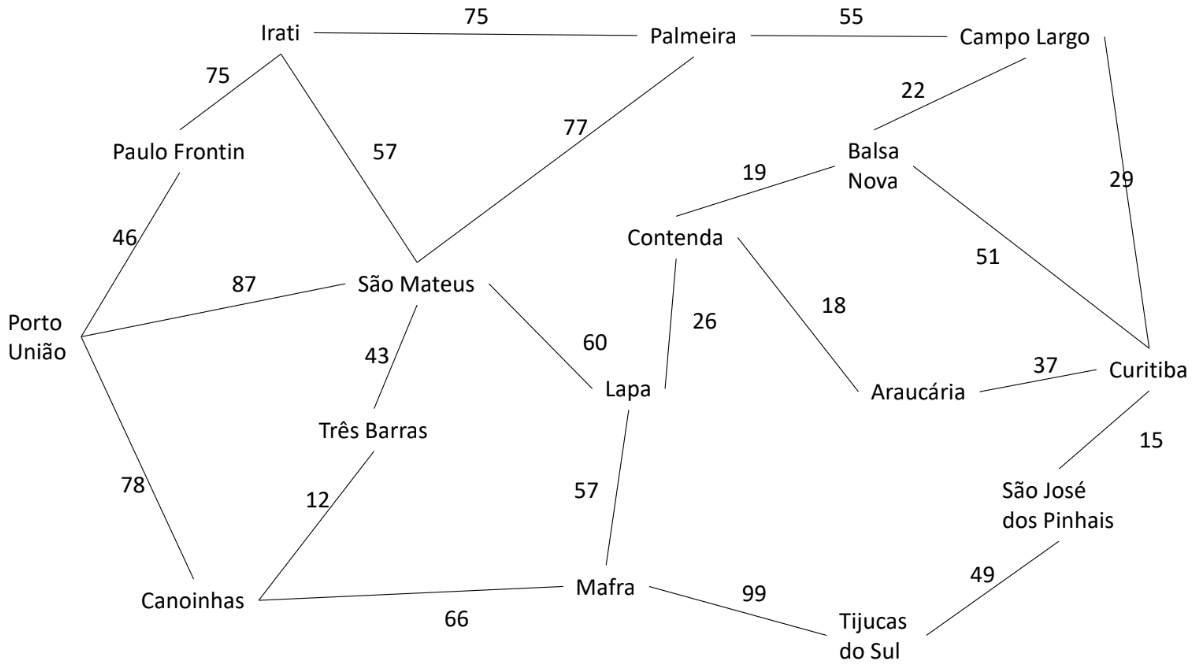
</div>

This problem represents a pathfinding challenge where the objective is to navigate through a network of interconnected cities, each linked by paths that have associated costs representing distances.

### Straight line distance between all cities and the objective

<div style="text-align: center">
    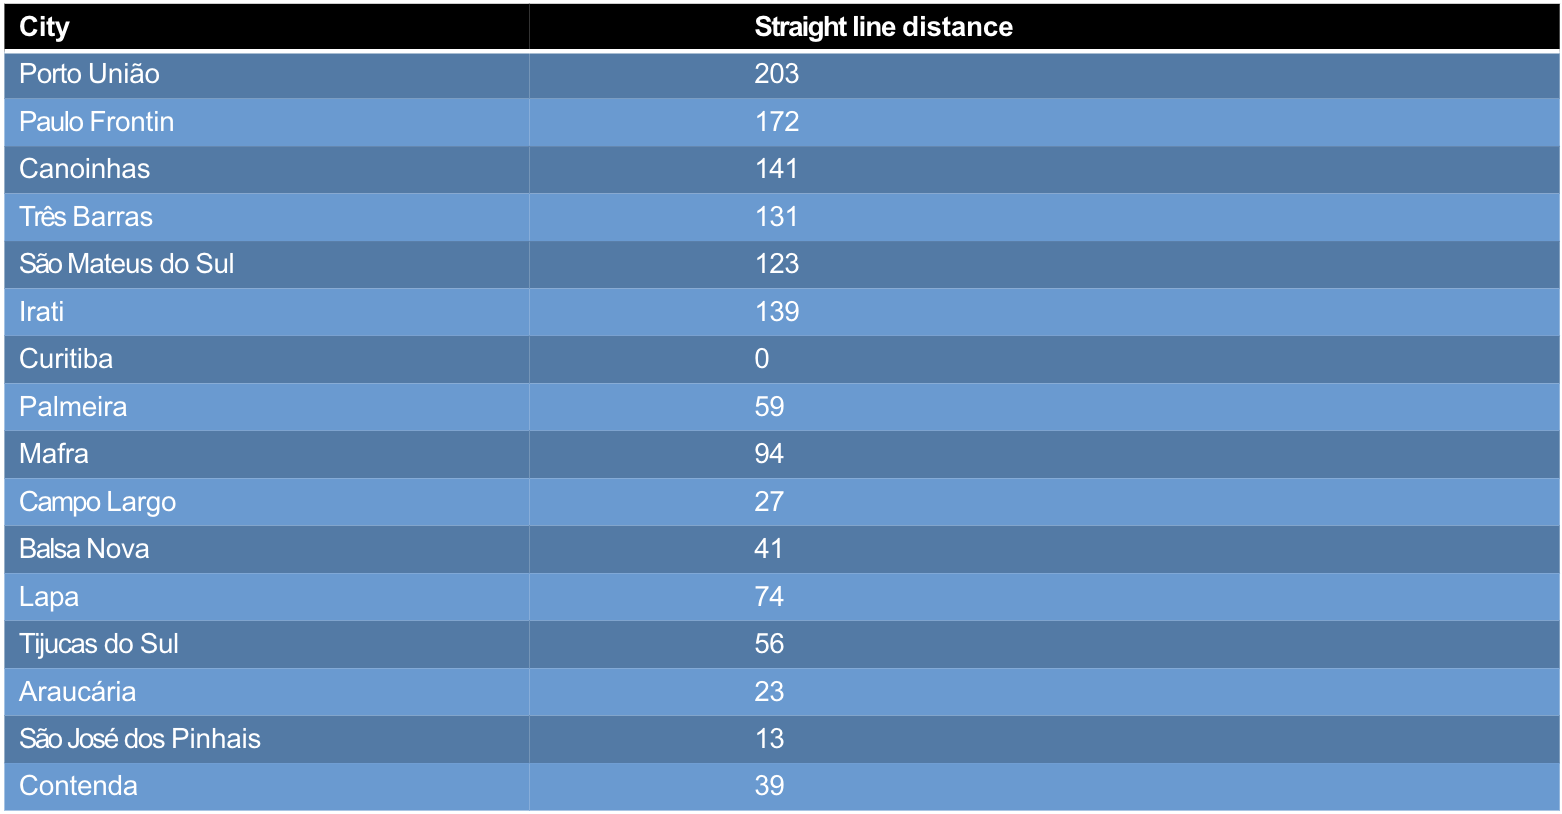
</div>

**Problem Definition:**

1. **Initial State:** The starting city from which the search begins.
2. **State Space:** The set of all cities on the map, with each city representing a possible state that can be reached.
3. **End State:** The target city that the search aims to reach; in this case `Curitiba`, as it has a straight-line distance of 0 to itself.
4. **Actions:** The transitions from one city to another, represented by the edges on the graph. Each action has a cost associated with it, which in this case is the distance between cities.
6. **Solution:** A sequence of actions (transitions from one city to another) that optimally leads from the initial state to the goal state according to the given path costs.

### Heuristics
Heuristics are used in this context to make informed decisions by estimating how close a given state is to the end state, then helping the algorithm to prioritize which paths to explore.

#### Greedy Search
In `Greedy Search`, the algorithm selects the path that appears to be leading most directly to the goal state at each step. It **doesn’t take into account** the **cost already incurred** to reach the current node, which could lead to **suboptimal solutions**.

- **Heuristic (h(n))**: An estimation of the cost from node n to the goal.
- **Selection Criterion**: Choose the node that has the **smallest estimated cost** to the goal.

#### A* Search
`A* Search` is an extension of Greedy Search that includes both the **cost to reach the current node**, and the **estimated cost to reach the goal**; this algorithm is less short-sighted than Greedy Search as it aims to **minimize** the **total estimated path cost**.

- **Heuristic (h(n))**: An estimation of the cost from node n to the goal.
- **Cost function (g(n))**: The actual cost from the start node to node n.
- **Evaluation function (f(n))**: f(n) = g(n) + h(n).
- **Selection Criterion**: Choose the node with the **smallest value of f(n)**; A* looks for the lowest-cost path considering both the **accumulated cost** so far and the **estimated cost** to the goal.

While `Greedy Search` can quickly find a path to the goal by following the seemingly best immediate choice, it can be misled by paths that start out promising but lead to high costs later; `A* Search` provides a more balanced and informed approach leading to more optimal solutions in complex search spaces.

# Implementation
The following classes (Vertex, Adjacent, and Graph) are responsible for the whole **structure** of the graph. The vertices and their adjacencies create the network that search algorithms can navigate, by working together to create and represent the graph structure.

 - The **Vertex** class defines the nodes.
 - The **Adjacent** class defines the edges between nodes.
 - The **Graph** class aggregates the vertices and adjacencies to form the complete network.

These classes provide the necessary components to model complex systems as graphs and to perform operations like searching for a path from one node to another using algorithms such as Greedy Search or A*.

### Vertex
<i>Class representing a node (state/place) within a graph.

In [1]:
class Vertex:
    
    """
    A Vertex in a graph which represents a node in a network.
    
    Attributes:
    label (str): The label or identifier for the vertex.
    visited (bool): A flag indicating whether the vertex has been visited.
    distance_objective (int): The heuristic estimate of the distance from this vertex to the goal.
    adjacent (list): A list of adjacent vertices, which represents the neighbors of an specific vertex (state - place).
    
    Methods:
    __init__: Initializes a new instance of the Vertex class.
    add_adjacent: Adds an adjacent vertex to the adjacency list.
    print_adjacent: Prints the labels and costs of all adjacent vertices (neighbors).
    """

    def __init__(self, label, distance_objective):
        
        """
        Initializes a Vertex with a label and an estimated distance to the objective (goal).
        
        Parameters:
        label (str): The label or identifier for the vertex.
        distance_objective (int): The heuristic estimate of distance to the goal.
        """
        
        self.label = label
        self.visited = False
        self.distance_objective = distance_objective # to final state
        self.adjacent = []

    def add_adjacent(self, adjacent):
        
        """
        Adds an edge to the list of adjacencies for this vertex.
        
        Parameters:
        adjacent: The Adjacent instance representing an adjacent vertex (neighbor).
        """
        
        self.adjacent.append(adjacent)

    def print_adjacent(self):
        """
        Prints the label and cost for each adjacent vertex (neighbor) to this vertex.
        """
        for i in self.adjacent:
            print(i.vertex.label, i.cost)


### Adjacent
<i>Class representing an Adjacent vertex (neighbor) from a given Vertex in the graph, along with its cost to travel to it. 

In [2]:
class Adjacent:
  def __init__(self, vertex, cost):
    self.vertex = vertex
    self.cost = cost 
    self.astar_distance = vertex.distance_objective + self.cost 

class Adjacent:
    
    """
    Represents an adjacent vertex (neighbor) in a graph, encapsulating the relationship
    between vertices and the cost associated with the edge connecting them.

    Attributes:
    vertex (Vertex): The neighbor vertex to which this object refers.
    cost (int): The cost to travel to this adjacent vertex.
    astar_distance (int): The estimated total cost from the current vertex, through
                          this neighbor, to the goal vertex. This is used by the A* search
                          algorithm and is calculated as the sum of the cost to move to
                          this neighbor and the neighbor's heuristic distance to the goal.

    Methods:
    __init__: Constructs an Adjacent object with the specified vertex and cost.
    """

    def __init__(self, vertex, cost):
        
        """
        Initializes an Adjacent object with the given adjacent vertex and the cost of 
        traveling to it, along with an A* heuristic distance calculation.

        Parameters:
        vertex (Vertex): The adjacent vertex.
        cost (int): The cost to travel to the adjacent vertex.
        """
        
        self.vertex = vertex
        self.cost = cost  # to move/travel to that specific place/vertex
        self.astar_distance = vertex.distance_objective + self.cost  # to final state + cost to move


### Graph
<i>Class encapsulating the entire structure of a graph, which is composed of vertices and its neighbors (more vertices). 

In [3]:
class Graph:
    
    """
    A graph representing a network of cities connected by roads. Each city is a vertex
    in the graph, and each road is represented by an adjacency with an associated cost.
    
    Attributes:
    Each attribute is a Vertex object representing a city in the graph.
    
    The vertices are instantiated with labels and heuristic distances, and adjacencies 
    are added using the Vertex class methods.

    Methods:
    reset_graph(): Resets the visited state of all vertices and their adjacents within the graph,
                   allowing for repeated searches without the need to recreate the graph or restart
                   the kernel.
    """
    
    #creating each state
    porto_uniao = Vertex('Porto União', 203)
    paulo_frontin = Vertex('Paulo Frontin', 172)
    canoinhas = Vertex('Canoinhas', 141)
    tres_barras = Vertex('Três Barras', 131)
    sao_mateus_do_sul = Vertex('São Mateus do Sul', 123)
    irati = Vertex('Irati', 139)
    curitiba = Vertex('Curitiba', 0)
    palmeira = Vertex('Palmeira', 59)
    mafra = Vertex('Mafra', 94)
    campo_largo = Vertex('Campo Largo', 27)
    balsa_nova = Vertex('Balsa Nova', 41)
    lapa = Vertex('Lapa', 74)
    tijucas_do_sul = Vertex('Tijucas do Sul', 56)
    araucaria = Vertex('Araucária', 23)
    sao_jose_dos_pinhais = Vertex('São José dos Pinhais', 13)
    contenda = Vertex('Contenda', 39)

    # adding neighbors to any specific state
    porto_uniao.add_adjacent(Adjacent(paulo_frontin, 46))
    porto_uniao.add_adjacent(Adjacent(sao_mateus_do_sul, 87))
    porto_uniao.add_adjacent(Adjacent(canoinhas, 78))

    paulo_frontin.add_adjacent(Adjacent(porto_uniao, 46))
    paulo_frontin.add_adjacent(Adjacent(irati, 75))
    
    canoinhas.add_adjacent(Adjacent(porto_uniao, 78))
    canoinhas.add_adjacent(Adjacent(tres_barras, 12))
    canoinhas.add_adjacent(Adjacent(mafra, 66))
    
    tres_barras.add_adjacent(Adjacent(sao_mateus_do_sul, 43))
    tres_barras.add_adjacent(Adjacent(canoinhas, 12))
    
    sao_mateus_do_sul.add_adjacent(Adjacent(irati, 57))
    sao_mateus_do_sul.add_adjacent(Adjacent(palmeira, 77))
    sao_mateus_do_sul.add_adjacent(Adjacent(lapa, 60))
    sao_mateus_do_sul.add_adjacent(Adjacent(tres_barras, 43))
    sao_mateus_do_sul.add_adjacent(Adjacent(porto_uniao, 87))
    
    irati.add_adjacent(Adjacent(palmeira, 75))
    irati.add_adjacent(Adjacent(sao_mateus_do_sul, 57))
    irati.add_adjacent(Adjacent(paulo_frontin, 75))
    
    curitiba.add_adjacent(Adjacent(campo_largo, 29))
    curitiba.add_adjacent(Adjacent(balsa_nova, 51))
    curitiba.add_adjacent(Adjacent(araucaria, 37))
    curitiba.add_adjacent(Adjacent(sao_jose_dos_pinhais, 15))
    
    palmeira.add_adjacent(Adjacent(campo_largo, 55))
    palmeira.add_adjacent(Adjacent(irati, 75))
    palmeira.add_adjacent(Adjacent(sao_mateus_do_sul, 77))
    
    mafra.add_adjacent(Adjacent(lapa, 57))
    mafra.add_adjacent(Adjacent(canoinhas, 66))
    mafra.add_adjacent(Adjacent(tijucas_do_sul, 99))
    
    campo_largo.add_adjacent(Adjacent(palmeira, 55))
    campo_largo.add_adjacent(Adjacent(balsa_nova, 22))
    campo_largo.add_adjacent(Adjacent(curitiba, 29))
    
    balsa_nova.add_adjacent(Adjacent(campo_largo, 22))
    balsa_nova.add_adjacent(Adjacent(contenda, 19))
    balsa_nova.add_adjacent(Adjacent(curitiba, 51))
    
    lapa.add_adjacent(Adjacent(contenda, 26))
    lapa.add_adjacent(Adjacent(mafra, 57))
    lapa.add_adjacent(Adjacent(sao_mateus_do_sul, 60))
    
    tijucas_do_sul.add_adjacent(Adjacent(sao_jose_dos_pinhais, 49))
    tijucas_do_sul.add_adjacent(Adjacent(mafra, 99))
    
    araucaria.add_adjacent(Adjacent(contenda, 18))
    araucaria.add_adjacent(Adjacent(curitiba, 37))
    
    sao_jose_dos_pinhais.add_adjacent(Adjacent(curitiba, 15))
    sao_jose_dos_pinhais.add_adjacent(Adjacent(tijucas_do_sul, 49))

    contenda.add_adjacent(Adjacent(balsa_nova, 19))
    contenda.add_adjacent(Adjacent(araucaria, 18))
    contenda.add_adjacent(Adjacent(lapa, 26))

    """
        Resets the visited state of all vertices in the graph. This method is used to
        clear the visited flags of all vertices and their adjacents, allowing the graph
        to be used for a new search without carrying over the state from previous searches.
    """

    def reset_graph(self):
        for vertex in [self.porto_uniao, self.paulo_frontin, self.canoinhas, 
                       self.tres_barras, self.sao_mateus_do_sul, self.irati, 
                       self.curitiba, self.palmeira, self.mafra, 
                       self.campo_largo, self.balsa_nova, self.lapa, 
                       self.tijucas_do_sul, self.araucaria, 
                       self.sao_jose_dos_pinhais, self.contenda]:
            vertex.visited = False
            for adj in vertex.adjacent:
                adj.vertex.visited = False

The following classes (OrderedArray, and Search) together form a robust framework for graph-based pathfinding, allowing for efficient searches through complex networks by leveraging sorted node processing and a flexible search methodology.

 - The **OrderedArray** class maintains an array of elements sorted according to a specific mode; handling the storage and ordered retrieval of nodes based on their heuristic values.
 - The **Search** class encapsulates the logic for conducting the searches within the graph; managing the search process, tracking the progress towards the objective, and ensuring the search is conducted according to the selected algorithm's rules.

### Ordered array
<i>Class essentially representating a priority queue structured to maintain its elements in a sorted order based on a certain criterion, which changes depending on the mode of the search algorithm being used.</i>

In [4]:
import numpy as np

class OrderedArray:

    """
    OrderedArray is a data structure that maintains elements in a sorted order based on a specified mode.
    It is designed to work with pathfinding algorithms where nodes need to be processed in an order
    that is determined by their heuristic values.

    Attributes:
        capacity (int): The maximum number of elements the array can hold.
        last_position (int): The index of the last valid element in the array.
        values (ndarray): A numpy array that stores the elements.
        mode (str): The mode of the array which determines the sorting criterion ('greedy' or 'astar').

    Methods:
        __init__(self, capacity, mode): Initializes a new OrderedArray with a specified capacity and mode.
        print(self): Prints the contents of the array based on the mode.
        insert(self, node): Inserts an element into the array while maintaining the order.
    """

    def __init__(self, capacity, mode):
        
        """
        Constructs a new OrderedArray with the given capacity and mode.

        Parameters:
            capacity (int): The maximum number of elements the array can hold.
            mode (str): The mode which determines the sorting criterion: either 'greedy' or 'astar'.
        """
        
        self.capacity = capacity
        self.last_position = -1
        self.values = np.empty(self.capacity, dtype=object)  # creating empty static array of n values depending on capacity - array of adjacent w astar_distance
        self.mode = mode.lower()

    def print(self):

        """
        Prints the elements of the OrderedArray. If the mode is 'greedy', it prints the label and distance_objective
        of each element. If the mode is 'astar', it prints the label, cost, distance_objective, and astar_distance
        of each element. If the array is empty, it also indicates so.
        """
        
        if self.last_position == -1:
            print('The array is empty!')
        else:
            for i in range(self.last_position + 1): # because last item is not printed - if lastpos is 2 it only prints till 1
                if self.mode == 'greedy':
                    print(i, ' - ', self.values[i].label, ' - ', self.values[i].distance_objective)
                elif self.mode == 'astar':
                    print(i, ' - ', self.values[i].vertex.label, ' - ',
                          self.values[i].cost, ' - ',
                          self.values[i].vertex.distance_objective, ' - ',
                          self.values[i].astar_distance)

    def insert(self, node):

        """
        Inserts a node into the OrderedArray while keeping it sorted based on the mode.
        If the array is at capacity, it notifies that no more elements can be added.
        
        Parameters:
            node: The node to be inserted into the array. 
        """
        
        if self.last_position == self.capacity - 1:
            print('Maximum capacity has been reached!')
            return
    
        compare_attr = 'distance_objective' if self.mode == 'greedy' else 'astar_distance'
    
        position = 0
        for i in range(self.last_position + 1): # go through whole graph
            position = i
            if getattr(self.values[i], compare_attr) > getattr(node, compare_attr):
                break
            if i == self.last_position: # when it reaches last element
              position = i + 1
    
        x = self.last_position # last index from array
        while x >= position: # going from the end point to the one i stored having greater values than the vertex i want to insert
          self.values[x + 1] = self.values[x] # setting space from the new vertex
          x -= 1 #iterating 
    
        self.values[x + 1] = node
        self.last_position += 1

### Search
<i>Class encapsulating the logic required to perform search operations within the graph structure previously defined, supporting both `Greedy Search`and `A* Search`.</i>

In [5]:
class Search:

    """
    Search is a class that encapsulates the logic for performing the search operations in the graph; supporting both
    Greedy and A* search modes to find a path to a specified objective.

    Attributes:
        objective (Vertex): The goal vertex that the search is trying to reach.
        found (bool): A flag indicating whether the objective has been found.
        mode (str): The mode of the search algorithm, either 'greedy' or 'astar'.

    Methods:
        __init__(self, objective): Initializes the Search object with the specified objective vertex.
        search(self, current, mode): Recursively searches for the objective from the current vertex in the specified mode.
    """
    
    def __init__(self, objective):

        """
        Initializes a Search object with the specified objective vertex.

        Parameters:
            objective (Vertex): The goal vertex that the search is trying to reach.
        """
        
        self.objective = objective
        self.found = False
        self.mode = 'greedy'

    def search(self, current, mode):

        """
        Recursively searches for the objective starting from the current vertex using the specified search mode.
        If the objective is found, sets the 'found' attribute to True.

        Parameters:
            current (Vertex): The current vertex from which the search will proceed.
            mode (str): The mode of the search algorithm to use, either 'greedy' or 'astar'.
        """
        
        # validate mode and set to default if invalid
        if mode.lower() not in ('greedy', 'astar'):
            mode = 'greedy'
        else:
            mode = mode.lower()

        print('--------')
        print('Current: {}'.format(current.label))
        current.visited = True

        if current == self.objective:
            self.found = True
            return  # Goal found, end search

        ordered_array = OrderedArray(len(current.adjacent), mode)  #creating array - initializing w sorting strategy
        for adjacent in current.adjacent: # go through all the vertices from all adjacents to current one
            if adjacent.vertex.visited == False: # if not visited
                adjacent.vertex.visited = True #then visited
                ordered_array.insert(adjacent if mode == 'astar' else adjacent.vertex)

        ordered_array.print() #once all adjacents are ordered, printing them

        if ordered_array.values[0] != None: # if not empty
            self.search(ordered_array.values[0].vertex if mode == 'astar' else ordered_array.values[0], mode)

## Search algorithm execution

<i>Instantiation of the Graph class, in order to create the map and then been able to run the Search algorithm.

In [6]:
graph = Graph()

Although only one implementation was required for this final task, we have decided to implement both, letting the user select **which** of the two **algorithms** to run, as well as the **initial state** in which to run it. 

By initially entering the mode (greedy or astar), followed by an initial point written as enunciated in the input message; at the moment the user wants to stop the execution, entering the string 'break' in the mode would be enough to, as it suggests, break the loop.

In [7]:
from IPython.display import clear_output

states = ["porto_uniao", "paulo_frontin", "canoinhas", "tres_barras", "sao_mateus_do_sul", "irati", "curitiba", "palmeira", "mafra", "campo_largo", "balsa_nova", "lapa", "tijucas_do_sul", "araucaria", "sao_jose_dos_pinhais", "contenda"]

while True:
    mode = input('\nIntroduce mode (greedy/astar - break to exit):')
    if mode == 'break':
        break
    if mode == "":
        print('\nMissing mode. Defaulting to Greedy Search.')
    else:
        print('\nWrong mode selected. Defaulting to Greedy Search.')
        
    search = Search(graph.curitiba) # objective node 

    starting_point = input('\nSelect starting point ("porto_uniao", "paulo_frontin", "canoinhas", "tres_barras", "sao_mateus_do_sul", "irati", "curitiba" - end goal state, "palmeira", "mafra", "campo_largo", "balsa_nova", "lapa", "tijucas_do_sul", "araucaria", "sao_jose_dos_pinhais", "contenda"):')
    if starting_point == 'break':
        break
    if starting_point == "":
        starting_point = 'porto_uniao'
        print('\nMissing starting point. Defaulting to Porto União - greatest straight-line distance to goal state.')
    while starting_point not in states:
        starting_point = input('\nIncorrect input, please introduce a valid starting point from the given options ("porto_uniao", "paulo_frontin", "canoinhas", "tres_barras", "sao_mateus_do_sul", "irati", "curitiba" - end goal state, "palmeira", "mafra", "campo_largo", "balsa_nova", "lapa", "tijucas_do_sul", "araucaria", "sao_jose_dos_pinhais", "contenda"):')
    
    search.search(getattr(graph, starting_point), mode) # call the search method stating the start node and the search mode
    graph.reset_graph()

    # comment following line if you want to keep results in cell output
    clear_output(wait=True)


Introduce mode (greedy/astar - break to exit): break
